# Imports

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to display image

In [2]:
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def display_image(img):
    # print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

# CNN architecture

In [3]:
class Cifar10CnnModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            # Conv-1
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.25),
            
            # Conv-2
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 64 x 16 x 16
            
            # Conv-3
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.25),

            # Conv-4
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 128 x 8 x 8

            # Conv-5
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout(0.25),            
            
            # Conv-6
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),           
            nn.ReLU(),
            nn.AvgPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 32),
            nn.Dropout(0.25),            
            nn.ReLU(),
            nn.Linear(32, 10))
        
    def forward(self, xb):
        return self.network(xb)

# Loading saved model

In [4]:
saved_model = Cifar10CnnModel()
saved_model.load_state_dict(torch.load('../saved_model/cifar10-cnn_with_bn_and_avg_pool.pth'))
saved_model.eval()

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.25, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.25, inplace=False)
    (12): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (16): Conv2d(128, 256, kernel_size

# Classes of CIFAR-10 dataset

In [5]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Loading 3 test images

In [6]:
image_1 = torch.load("./test_images/image_1.pt")
image_2 = torch.load("./test_images/image_2.pt")
image_3 = torch.load("./test_images/image_3.pt")

# Displaying images

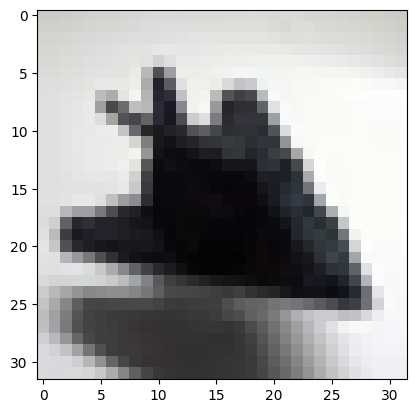

In [7]:
display_image(image_1)

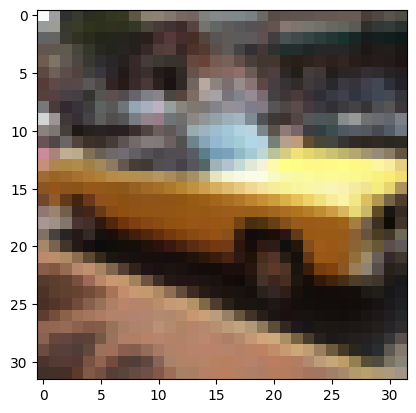

In [8]:
display_image(image_2)

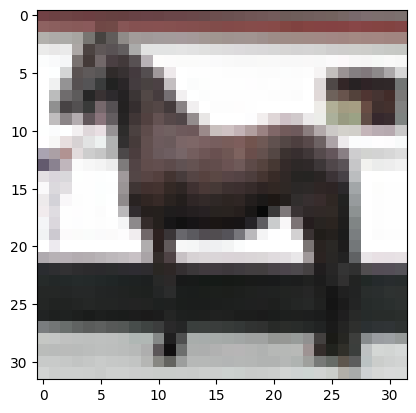

In [9]:
display_image(image_3)

# Performing prediction

In [10]:
image_list = [image_1, image_2, image_3]

for image in image_list:
    # Resizing the image for performing prediction using the saved model
    resized_image = image[None,:,:,:]

    # Performing prediction
    output = saved_model(resized_image)

    # Getting the label
    outout_list = output[0].tolist()
    max_ = max(outout_list)
    class_ = outout_list.index(max_)

    print("The prediction is: ", classes[class_])


The prediction is:  airplane
The prediction is:  automobile
The prediction is:  horse
